In [10]:
import pandas as pd     
import matplotlib.pyplot as plt              
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [11]:
df = pd.read_excel("Predictive maintenance system for network infrastructure.xlsx")
df.head(10)

,Timestamp,Device,CPU (%),Memory (%),Errors (Count),Traffic (Mbps),Current Status,System State,Historical State,Future State Prediction
0,2024-11-22 09:20:00,Router_A,99.88,36.92,1,213.78,Critical,Future,NaN,Critical
1,2024-11-22 09:25:00,Firewall_1,49.51,58.82,4,130.31,Healthy,Future,NaN,Healthy
2,2024-11-22 11:00:00,Switch_3,54.81,83.62,27,355.47,At Risk,Future,NaN,Healthy
3,2024-11-22 11:05:00,Router_C,63.68,86.95,15,356.59,Healthy,Future,NaN,At Risk
4,2024-11-22 11:35:00,Router_A,25.42,89.29,48,79.45,Healthy,Future,NaN,Critical
5,2024-11-22 12:00:00,Switch_1,37.25,69.03,33,209.37,Healthy,Historical,Overloaded,NaN
6,2024-11-22 12:35:00,Router_B,63.00,39.63,21,64.75,At Risk,Future,NaN,Healthy
7,2024-11-22 13:10:00,Switch_1,62.70,67.34,35,398.76,Healthy,Future,NaN,Healthy
8,2024-11-22 13:20:00,Router_B,95.50,86.14,46,102.76,Healthy,Future,NaN,Critical
9,2024-11-22 14:30:00,Router_A,75.91,57.70,12,162.70,Critical,Future,NaN,At Risk


In [12]:
# Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# Drop rows with missing values for the relevant columns
df_cleaned = df.dropna(subset=['CPU (%)', 'Memory (%)', 'Errors (Count)', 'Traffic (Mbps)'])
df_cleaned.columns

Index(['Timestamp', 'Device', 'CPU (%)', 'Memory (%)', 'Errors (Count)',
       'Traffic (Mbps)', 'Current Status', 'System State', 'Historical State',
       'Future State Prediction'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5771 entries, 0 to 5770
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Timestamp                5771 non-null   datetime64[ns]
 1   Device                   5771 non-null   object        
 2   CPU (%)                  5771 non-null   float64       
 3   Memory (%)               5771 non-null   float64       
 4   Errors (Count)           5771 non-null   int64         
 5   Traffic (Mbps)           5771 non-null   float64       
 6   Current Status           5771 non-null   object        
 7   System State             5771 non-null   object        
 8   Historical State         5757 non-null   object        
 9   Future State Prediction  5764 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 451.0+ KB


In [14]:
features = ["Traffic (Mbps)", "Memory (%)", "Errors (Count)"]
target = "CPU (%)"

X = df_cleaned[features]
y = df_cleaned[target]

# Preparation of the data

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Training the model

model = LinearRegression()
model.fit(X_train, y_train)

# Predict the CPU percentage on test
y_pred = model.predict(X_test)
y_pred[:10]

array([52.64334626, 52.16396868, 52.17960195, 52.26679702, 53.24894518,
       52.94626616, 53.80536369, 51.85985915, 53.49303522, 52.42223109])

In [16]:
# Model evaluation
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R²) score
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")


Mean Squared Error (MSE): 587.1168476006616
R-squared (R²): -0.00043390893656569673
Mean Absolute Error (MAE): 20.82386452122676


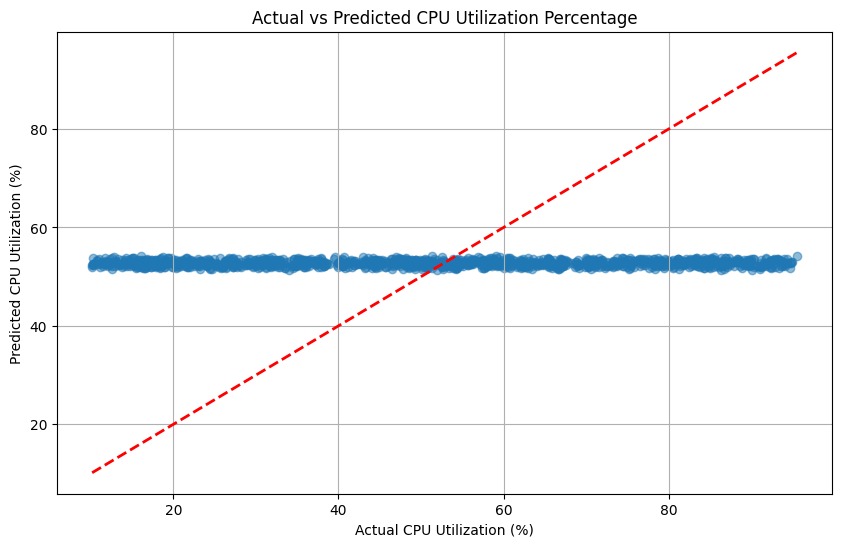

Feature Importance:
          Feature  Coefficient
1      Memory (%)     0.026541
2  Errors (Count)     0.011974
0  Traffic (Mbps)    -0.001787


In [17]:
# Visualize results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Actual vs Predicted CPU Utilization Percentage")
plt.xlabel("Actual CPU Utilization (%)")
plt.ylabel("Predicted CPU Utilization (%)")
plt.grid()
plt.show()

# Display feature importance (coefficients)
coefficients = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("Feature Importance:")
print(coefficients)